In [3]:
import ast
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

<>:5: SyntaxWarning: invalid escape sequence '\P'
<>:5: SyntaxWarning: invalid escape sequence '\P'
C:\Users\Akkju\AppData\Local\Temp\ipykernel_15292\804188518.py:5: SyntaxWarning: invalid escape sequence '\P'
  df = pd.read_csv('D:\Projects\Python_Data_Project\data_jobs.csv')


In [4]:
def clean_list(skills_list):
    if pd.notna(skills_list):
        return ast.literal_eval(skills_list)
    
df['job_skills'] = df['job_skills'].apply(clean_list)

In [5]:
df = df[df['job_title_short'] == 'Data Analyst']

In [7]:
df_exploded = df.explode('job_skills')

In [15]:
skills_stats = df_exploded.groupby('job_skills').agg(
    skills_count =('job_skills','count'),
    median_salary =('salary_year_avg', 'median')
)

In [32]:
skills_stats= skills_stats.sort_values(by ='skills_count',ascending=False).head(10)

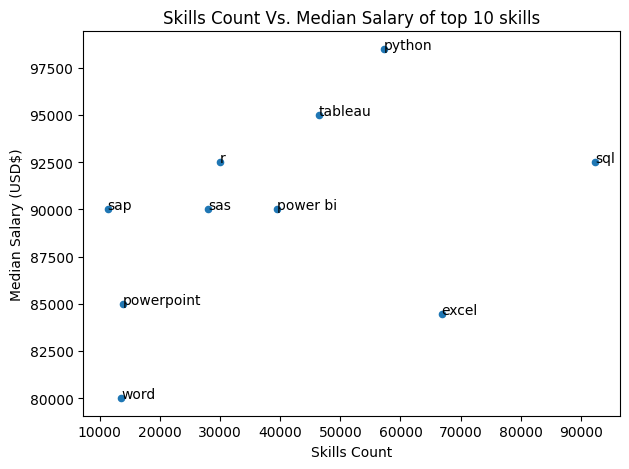

In [36]:
skills_stats.plot(kind='scatter',y='median_salary',x='skills_count')
plt.title('Skills Count Vs. Median Salary of top 10 skills')
plt.tight_layout()
plt.ylabel("Median Salary (USD$)")
plt.xlabel('Skills Count')

for i, txt in enumerate(skills_stats.index):
    plt.text(skills_stats['skills_count'].iloc[i], skills_stats['median_salary'].iloc[i],txt)

plt.show()